In [1]:
import sys
import os
import numpy as np
import pandas as pd
import anndata
import scanpy as sc
import matplotlib.pyplot as plt
R_path = 'source /etc/profile;module load GCC/11.2.0 OpenMPI/4.1.1 R/4.2.0 Anaconda3/2022.05 R-bundle-Bioconductor/3.15-R-4.2.0;R'
import spider

In [2]:
import time
from spider import SPIDER
op=SPIDER()
adata = anndata.read_h5ad('./adata.h5ad')
if not os.path.exists('./test/'):
    os.mkdir('./test/')
out_f = './test/'
if len(adata.obs_names) > 200:
    sc.pp.filter_genes(adata, min_cells=20)
start = time.time()
idata = op.prep(adata, cluster_key=adata.uns['cluster_key'], is_human=adata.uns['is_human'], is_sc=adata.uns['is_sc'], itermax=1000, imputation=True, normalize_total=True)
idata.write(f'{out_f}idata.h5ad')
runtime = time.time()-start
with open(f'{out_f}ot_runtime.txt', 'w') as f:
    f.write(str(runtime))
start = time.time()
op.svi.tf_corr(idata, adata, adata.uns['is_human'], out_f, threshold=0.3, n_jobs=20, overwrite=True, step=None, keep_top_score=5)
runtime = time.time()-start
with open(f'{out_f}tf_runtime.txt', 'w') as f:
    f.write(str(runtime))
start = time.time()
idata, meta_idata = op.find_svi(idata, out_f, R_path, alpha=0.3, overwrite=True, n_jobs=20, svi_number=0)
runtime = time.time()-start
with open(f'{out_f}svi_runtime.txt', 'w') as f:
    f.write(str(runtime))

Using human LR pair dataset.
Using human pathway dataset.
Running imputation with MAGIC
Calculating MAGIC...
  Running MAGIC on 428 cells and 5581 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.23 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.06 seconds.
    Calculating affinities...
    Calculated affinities in 0.05 seconds.
  Calculated graph and diffusion operator in 0.34 seconds.
  Calculating imputation...
  Calculated imputation in 0.02 seconds.
Calculated MAGIC in 0.37 seconds.
Normalizing total counts per cell to the median of total counts for cells before normalization
using 0.75
Located 1151 interfaces on 1267 power cell boundaries with distance cutoff 1.4142135623730951.
Dropped 185 out of 1151 interfaces for low capacity cells.
Normalizing total interaction strength per interface to the median of total interaction strength for interfaces before normalization
Construct idata with 1394 interfaces and

Processing cells: 100%|██████████| 428/428 [00:20<00:00, 20.80it/s]


0227:1525


Processing receptors: 100%|██████████| 92/92 [00:03<00:00, 27.48it/s] 


374/386 LRIs (97%) are predicted to be activated by downstream genes (threshold=0.3).
Excluded 12/498 LRIs (2%) without SV support (threshold=0.3).
using 16*16 SOM nodes for 1394 points


-------------------------------------------------------------------------------
The following dependent module(s) are not currently loaded: ncurses/6.0 (required by: htop/2.0.1)
-------------------------------------------------------------------------------

The following have been reloaded with a version change:
  1) ncurses/6.0 => ncurses/6.2



ARGUMENT './test/idata_count.csv' __ignored__

ARGUMENT './test/idata_meta.csv' __ignored__

ARGUMENT './test/' __ignored__

ARGUMENT '20' __ignored__


R version 4.2.0 (2022-04-22) -- "Vigorous Calisthenics"
Copyright (C) 2022 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu (64-bit)

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

  Natural language support but running in an English locale

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML browser interface to help.
Type 'q()' to quit R.

> library(nnSVG)
> library(scran)


Loading required package: SingleCellExperiment
Loading required package: SummarizedExperiment
Loading required package: MatrixGenerics
Loading required package: matrixStats

Attaching package: ‘MatrixGenerics’

The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOr

> library(SpatialExperiment)
> library(BRISC)
> 
> args = commandArgs()
> 
> if (length(args)==0) {
+   stop("not enough input", call.=FALSE)
+ }
> 
> count_f <- args[4]
> meta_f <- args[5]
> out_f <- args[6]
> 
> counts <- read.csv(count_f, row.names=1, check.names=F, stringsAsFactors=FALSE)
> colData <- read.csv(meta_f, stringsAsFactors=FALSE, row.names=1, check.names=F)
> rowData <- data.frame(gene_name=colnames(counts))
> 
> tryCatch({
+   spe <-  SpatialExperiment(
+     assay = list(counts = t(counts)), 
+     colData = colData, 
+     rowData = rowData,
+     spatialCoordsNames = c("row", "col"))
+   ix_zero_genes <- rowSums(counts(spe)) == 0
+   if (sum(ix_zero_genes) > 0) {
+     spe <- spe[!ix_zero_genes, ]
+   }
+ 
+   spe <- computeLibraryFactors(spe)
+   size_factors <- sizeFactors(spe)
+   zero_sf_cells <- names(size_factors[size_factors == 0])
+   spe <- spe[, !colnames(spe) %in% zero_sf_cells]
+   spe <- logNormCounts(spe)
+   # replace nan with 0
+   counts(spe)[is.na(

Loading required package: RANN
Loading required package: parallel
Loading required package: rdist
Loading required package: pbapply
The ordering of inputs x (covariates) and y (response) in BRISC_estimation has been changed BRISC 1.0.0 onwards.
  Please check the new documentation with ?BRISC_estimation.


> 
> 
> 
Added key nnSVG in idata.uns


Models: 100%|██████████| 10/10 [00:10<00:00,  1.06s/it]
2024-09-25 11:47:16.704836: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


Added key SOMDE in idata.uns


2024-09-25 11:47:16.707031: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-25 11:47:16.743953: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-25 11:47:17.450719: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-09-25 11:47:19.476167: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55e9f24cd220 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2024-09-25 11:47:19.476206: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2024-09-25 11:47:19.498260: I ./tensorflow/compiler/jit/device_compiler.h:186] Compile

Added key SpatialDE2 in idata.uns


Models: 100%|██████████| 10/10 [00:10<00:00,  1.10s/it]


Added key SpatialDE in idata.uns


-------------------------------------------------------------------------------
The following dependent module(s) are not currently loaded: ncurses/6.0 (required by: htop/2.0.1)
-------------------------------------------------------------------------------

The following have been reloaded with a version change:
  1) ncurses/6.0 => ncurses/6.2



ARGUMENT './test/idata_count.csv' __ignored__

ARGUMENT './test/idata_meta.csv' __ignored__

ARGUMENT './test/' __ignored__

ARGUMENT '20' __ignored__


R version 4.2.0 (2022-04-22) -- "Vigorous Calisthenics"
Copyright (C) 2022 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu (64-bit)

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

  Natural language support but running in an English locale

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML browser interface to help.
Type 'q()' to quit R.

> library('SPARK')
> args = commandArgs()
> set.seed(20230617)
> 
> if (length(args)==0) {
+   stop("not enough input", call.=FALSE)
+ }
> 
> count_f <

100%|██████████| 1000/1000 [00:03<00:00, 264.15/s]


Added key moranI in idata.uns


100%|██████████| 1000/1000 [00:04<00:00, 246.64/s]


Added key gearyC in idata.uns
finished running all SVI tests
Using the results from SVI identification methods: ['SOMDE' 'SpatialDE' 'SpatialDE2' 'SPARKX' 'nnSVG' 'scGCO' 'gearyC'
 'moranI']
43/498 SVIs identified (threshold=0.01).
Excluding 1 genes without TF support
42/498 tf-supported SVIs identified.
normalizing
normalizing
normalizing
{0: -1, 4: -1}
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
[42]
using controlled pattern
finished regression


Models: 100%|██████████| 10/10 [00:01<00:00,  9.71it/s]


finished lengthscale
iter 0, ELBO: -2.16e+10
iter 1, ELBO: -2.16e+10, delta_ELBO: 2.77e+07
iter 2, ELBO: -2.16e+10, delta_ELBO: 1.69e+04
iter 3, ELBO: -2.16e+10, delta_ELBO: 1.32e+04
iter 4, ELBO: -2.16e+10, delta_ELBO: 4.94e+03
iter 5, ELBO: -2.16e+10, delta_ELBO: 1.85e+02
iter 6, ELBO: -2.16e+10, delta_ELBO: 5.94e+00
iter 7, ELBO: -2.16e+10, delta_ELBO: 8.07e-01
iter 8, ELBO: -2.16e+10, delta_ELBO: 2.74e-02
iter 9, ELBO: -2.16e+10, delta_ELBO: 1.03e-03
Converged on iter 9
finished fitting
eventually found 5 patterns
[1 4 0 1 4 4 4 4 2 0 0 4 0 2 0 4 4 1 0 2 3 2 4 1 0 0 2 1 0 2 0 3 2 2 1 0 2
 3 2 1 2 2]
Added key pattern_score in idata.obsm and method results and running time in uns


Using the results from SVI identification methods: ['SOMDE' 'SpatialDE' 'SpatialDE2' 'SPARKX' 'nnSVG' 'scGCO' 'gearyC'
 'moranI']
43/498 SVIs identified (threshold=0.01).
Excluding 1 genes without TF support
42/498 tf-supported SVIs identified.
evaluating with ['moranI' 'gearyC' 'SOMDE' 'nnSVG']
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Geary
C (rev.)_SVI vs. Geary
C (rev.)_Excluded: Mann-Whitney-Wilcoxon test greater with Benjamini-Hochberg correction, P_val:1.668e-18 U_stat=1.734e+04
Moran
I_SVI vs. Moran
I_Excluded: Mann-Whitney-Wilcoxon test greater with Benjamini-Hochberg correction, P_val:9.671e-19 U_stat=1.740e+04
FSV
(SOMDE)_SVI vs. FSV
(SOMDE)_Excluded: Mann-Whitney-Wilcoxon test greater with Benjamini-Hochberg correction, P_val:2.498e-19 U_stat=1.753e+04
LR
(SOMDE)_SVI vs. LR
(SOMDE)_Excluded: Mann-Whitney-Wilcoxon test greater with Benjam

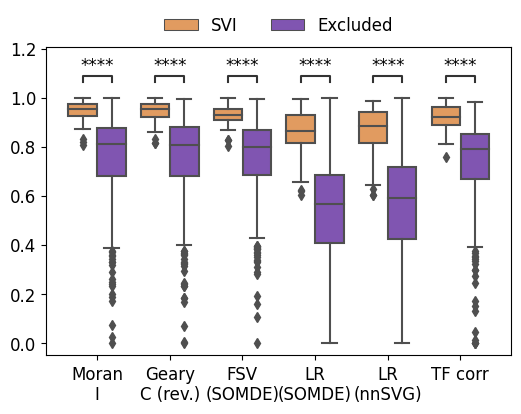

In [3]:
svi_df, svi_df_strict = op.svi.combine_SVI(idata,threshold=0.01)
op.svi.eva_SVI(idata, svi_df_strict)
plt.show()

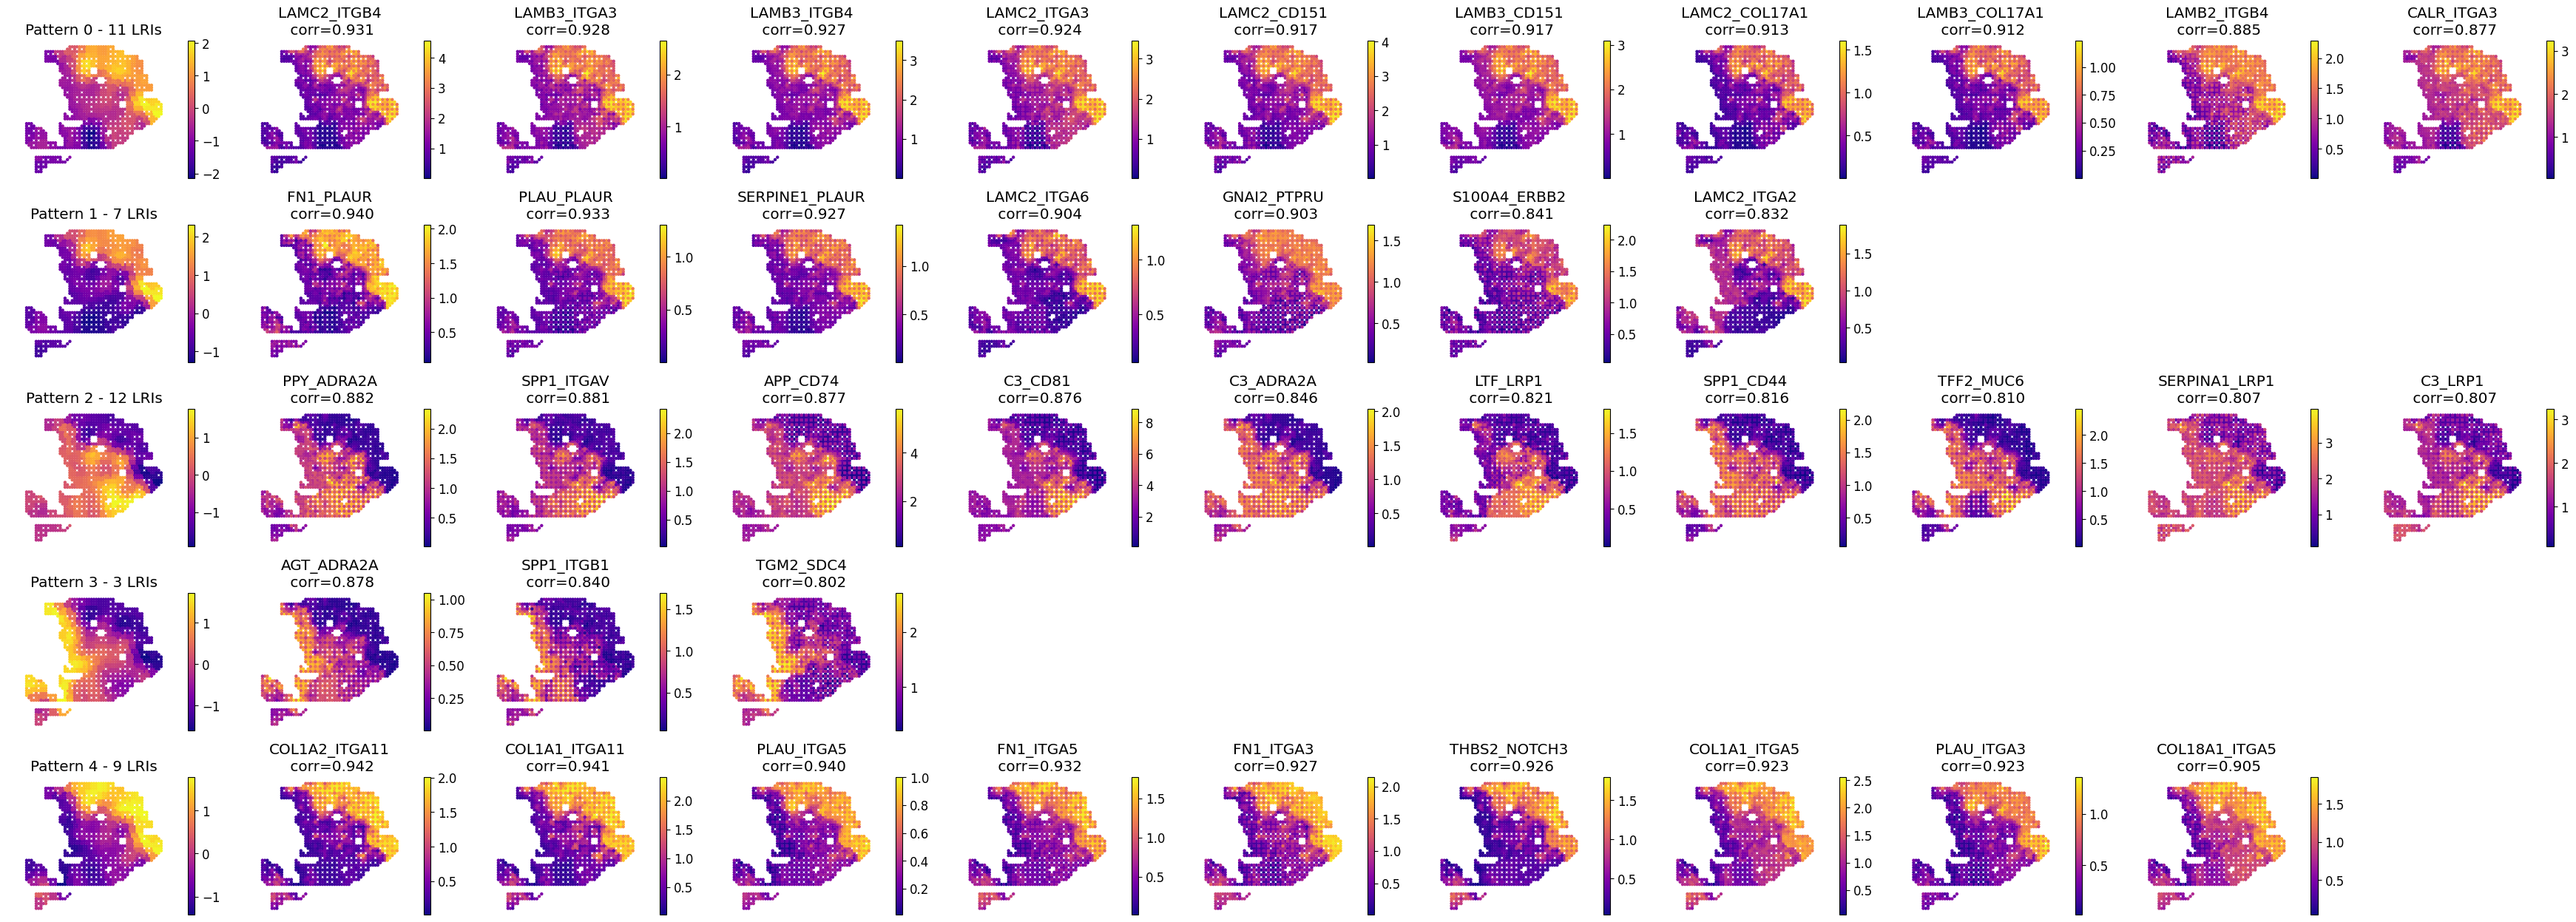

In [4]:
op.vis.pattern_LRI(idata,show_SVI=10, spot_size=10)
plt.tight_layout()
plt.show()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1_non-member vs. 1_member: Mann-Whitney-Wilcoxon test smaller with Benjamini-Hochberg correction, P_val:2.806e-03 U_stat=4.300e+01
0_non-member vs. 0_member: Mann-Whitney-Wilcoxon test smaller with Benjamini-Hochberg correction, P_val:6.859e-06 U_stat=1.800e+01
2_non-member vs. 2_member: Mann-Whitney-Wilcoxon test smaller with Benjamini-Hochberg correction, P_val:2.901e-07 U_stat=0.000e+00
3_non-member vs. 3_member: Mann-Whitney-Wilcoxon test smaller with Benjamini-Hochberg correction, P_val:8.711e-05 U_stat=0.000e+00
4_non-member vs. 4_member: Mann-Whitney-Wilcoxon test smaller with Benjamini-Hochberg correction, P_val:3.302e-06 U_stat=1.000e+00


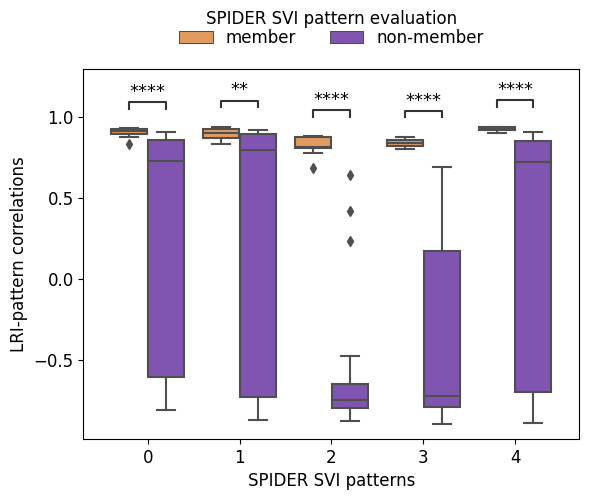

In [5]:
op.svi.eva_pattern(idata)
plt.show()